# Importando libs para o tratamento dos dados

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rc('figure', figsize = (14,6))

# Importando dados para iniciar o tratamento

In [3]:
!ls

 geladeiras_americanas.csv   notebook_gamer_americanas.csv
 livros_americanas.csv	    'Tratamento dos dados da americanas.ipynb'


## Função para tratamento dos arquivos

In [145]:
# Função que pega os valores das colunas e deixa de uma forma para transformar en float
def tratamento_virgula_ponto(dataset, coluns):
    for colun in coluns:
        for i in range(dataset.shape[0]):
            if len(dataset.loc[i, colun]) > 6:
                dataset.loc[i, colun] = dataset.loc[i, colun].replace(',', '.')
                dataset.loc[i, colun] = dataset.loc[i, colun].replace('.', '', 1)
            else:
                dataset.loc[i, colun] = dataset.loc[i, colun].replace(',', '.')
        dataset = dataset.astype({colun:float})
    return dataset

## Geladeiras

In [4]:
geladeira_americanas = pd.read_csv('geladeiras_americanas.csv', sep = ';')
geladeira_americanas

,nome,preco_a_vista,parcelas,preco_parcelado
0,Geladeira / Refrigerador Brastp Duplex BRM44 F...,"2,499,99",1,0
1,Geladeira Brastp BRM44HK Frost Free Duplex 375...,"3,098,99",12,"258,24"
2,Geladeira/Refrigerador Electrolux DC35A Branca...,"1,789,99",1,0
3,Geladeira Electrolux Tf39 Frost Free 2 Portas ...,"2,045,07",1,0
4,Geladeira/Refrigerador Electrolux French Door ...,"5,998,99",1,0
...,...,...,...,...
1141,Prateleira Diversos Cinza Brastp,"66,11",6,"11,01"
1142,Mini Refrigerador Ar Pessoal Ultra Refrigeraçã...,"157,5",12,"13,12"
1143,Prateleira Aramada Refrigerador Electrolux Dc4...,"39,9",4,"9,97"
1144,Adesivo para envelopamento Geladeiras Móveis 1...,"18,18",1,0


In [5]:
geladeira_americanas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             1146 non-null   object
 1   preco_a_vista    1146 non-null   object
 2   parcelas         1146 non-null   int64 
 3   preco_parcelado  1146 non-null   object
dtypes: int64(1), object(3)
memory usage: 35.9+ KB


In [6]:
geladeira_americanas = tratamento_virgula_ponto(geladeira_americanas, ['preco_a_vista', 'preco_parcelado'])

In [7]:
geladeira_americanas

,nome,preco_a_vista,parcelas,preco_parcelado
0,Geladeira / Refrigerador Brastp Duplex BRM44 F...,2499.99,1,0.00
1,Geladeira Brastp BRM44HK Frost Free Duplex 375...,3098.99,12,258.24
2,Geladeira/Refrigerador Electrolux DC35A Branca...,1789.99,1,0.00
3,Geladeira Electrolux Tf39 Frost Free 2 Portas ...,2045.07,1,0.00
4,Geladeira/Refrigerador Electrolux French Door ...,5998.99,1,0.00
...,...,...,...,...
1141,Prateleira Diversos Cinza Brastp,66.11,6,11.01
1142,Mini Refrigerador Ar Pessoal Ultra Refrigeraçã...,157.50,12,13.12
1143,Prateleira Aramada Refrigerador Electrolux Dc4...,39.90,4,9.97
1144,Adesivo para envelopamento Geladeiras Móveis 1...,18.18,1,0.00


In [8]:
geladeira_americanas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nome             1146 non-null   object 
 1   preco_a_vista    1146 non-null   float64
 2   parcelas         1146 non-null   int64  
 3   preco_parcelado  1146 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 35.9+ KB


Não temos elementos nulos nos dados, mas temos produtos que não são da categoria desejada

## Vamos começar a tratar a tabela geladeira e tirar tudo que não for geladeira

Para eveitar problemas de média e variação de preço muito grande.

In [9]:
geladeira_americanas.describe()

,preco_a_vista,parcelas,preco_parcelado
count,1146.000000,1146.000000,1146.00000
mean,1602.308866,4.769634,57.84678
std,2688.444416,4.636403,158.43986
min,2.060000,0.000000,0.00000
25%,71.037500,1.000000,0.00000
50%,209.205000,2.000000,10.00000
75%,2669.000000,10.000000,19.97500
max,21016.240000,12.000000,1694.25000


In [10]:
# Fazendo uma seleção, deduzindo que não vai ter geladeiras com o preço menor que 1700
geladeira_americanas2 = geladeira_americanas[geladeira_americanas['preco_a_vista'] >= 1700]

In [11]:
geladeira_americanas2.describe()

,preco_a_vista,parcelas,preco_parcelado
count,361.000000,361.000000,361.000000
mean,4541.736537,4.875346,154.361856
std,3173.904686,5.209337,255.484829
min,1709.100000,0.000000,0.000000
25%,2889.000000,1.000000,0.000000
50%,3626.730000,1.000000,0.000000
75%,4700.210000,12.000000,268.580000
max,21016.240000,12.000000,1694.250000


In [12]:
geladeira_americanas2[geladeira_americanas2['preco_a_vista'] == 1709.10]

,nome,preco_a_vista,parcelas,preco_parcelado
91,Refrigerador Cycle Defrost 276 Litros rcd 34 -...,1709.1,1,0.0
302,Freezer e Conservador Horizontal EOS EcoGelo 1...,1709.1,1,0.0


## Vamos plotar alguns gráficos para análise

In [16]:
# Vamos preparar uma coluna para não ter exibição de nomes e deixar o grafico menos visivel
geladeira_americanas2['index'] = list(range(geladeira_americanas2.shape[0]))

/tmp/ipykernel_4663/260291709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geladeira_americanas2['index'] = list(range(geladeira_americanas2.shape[0]))


<AxesSubplot:xlabel='index', ylabel='preco_a_vista'>

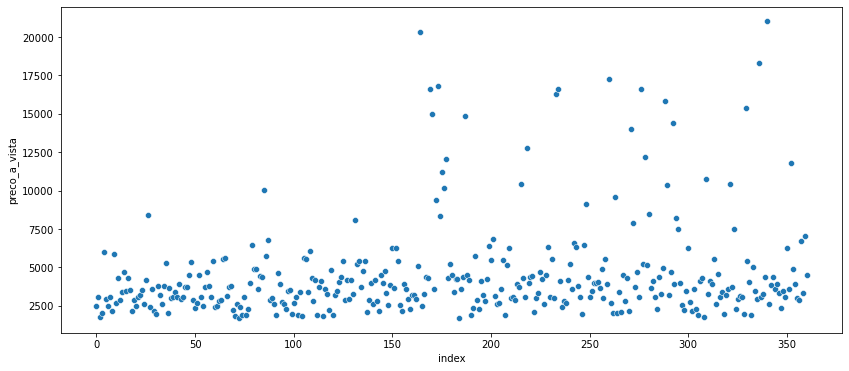

In [17]:
sns.scatterplot(x = 'index', y = 'preco_a_vista', data = geladeira_americanas2)

array([[<AxesSubplot:title={'center':'preco_a_vista'}>]], dtype=object)

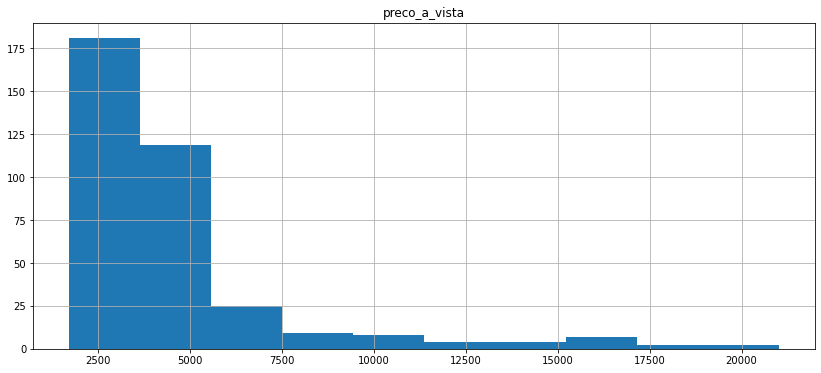

In [18]:
geladeira_americanas2.hist(['preco_a_vista'])

vamos agora fazer a remoção dos outliers para termos um histograma mais visivel

In [19]:
valor = geladeira_americanas2['preco_a_vista']
q1 = valor.quantile(.25)
q3 = valor.quantile(.75)
iiq = q3 - q1
limite_inferior = q1 - 1.5*iiq
limite_superior = q3 + 1.5*iiq

selecao = (valor >= limite_inferior) & (valor <= limite_superior)
geladeira_americanas3 = geladeira_americanas2[selecao]

array([[<AxesSubplot:title={'center':'preco_a_vista'}>]], dtype=object)

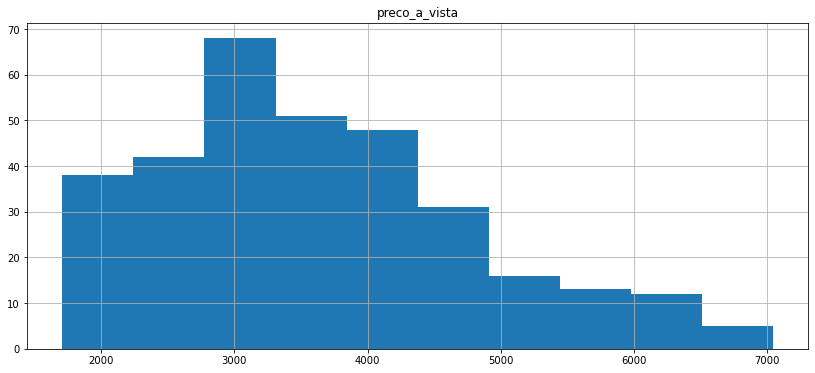

In [20]:
geladeira_americanas3.hist(['preco_a_vista'])

In [21]:
geladeira_americanas3.describe().round(2)

,preco_a_vista,parcelas,preco_parcelado,index
count,324.00,324.00,324.00,324.00
mean,3627.00,4.82,123.16,173.41
std,1183.73,5.19,166.86,105.24
min,1709.10,0.00,0.00,0.00
25%,2787.50,1.00,0.00,81.75
50%,3478.00,1.00,0.00,165.50
75%,4319.10,10.50,263.03,261.25
max,7039.12,12.00,624.04,360.00


E mesmo depois da remoção dos outliers vemos que o valor da parcela tem praticamente os mesmos valores

## Livros

In [3]:
livros_americanas = pd.read_csv('livros_americanas.csv', sep = ';')

In [4]:
livros_americanas

,nome,preco_a_vista,parcelas,preco_parcelado
0,Coleção Harry Potter - 7 Volumes (português) C...,"129,99",12,"10,83"
1,Livro - Harry Potter e a pedra filosofal,"26,99",2,"13,49"
2,Box Corte De Espinhos E Rosas – 4 Volumes (aco...,"169,79",12,"14,14"
3,"Box Comorativo Jogos Vorazes - 1ª Ed,","109,9",11,"9,99"
4,Livro - Harry Potter e a câmara secreta,"24,5",2,"12,25"
...,...,...,...,...
1147,Livro - Nyxia,"34,43",3,"11,47"
1148,"Livro - Guitarra, A","18,04",1,"18,04"
1149,Livro - Território Fantasma,"36,16",3,"12,05"
1150,Livro - Lino Yang: E os Herdeiros dos Deuses,"26,6",2,"13,3"


In [13]:
livros_americanas2 = livros_americanas.drop_duplicates(subset = "nome")
livros_americanas2

,nome,preco_a_vista,parcelas,preco_parcelado
0,Coleção Harry Potter - 7 Volumes (português) C...,"129,99",12,"10,83"
1,Livro - Harry Potter e a pedra filosofal,"26,99",2,"13,49"
2,Box Corte De Espinhos E Rosas – 4 Volumes (aco...,"169,79",12,"14,14"
3,"Box Comorativo Jogos Vorazes - 1ª Ed,","109,9",11,"9,99"
4,Livro - Harry Potter e a câmara secreta,"24,5",2,"12,25"
...,...,...,...,...
1147,Livro - Nyxia,"34,43",3,"11,47"
1148,"Livro - Guitarra, A","18,04",1,"18,04"
1149,Livro - Território Fantasma,"36,16",3,"12,05"
1150,Livro - Lino Yang: E os Herdeiros dos Deuses,"26,6",2,"13,3"


In [16]:
livros = livros_americanas2['nome'].unique()

In [18]:
part = []
for livro in livros:
    part.append(livro.split()[0])

set(part)

{'1',
 '100',
 '1000',
 '4',
 '7',
 'A',
 'Across',
 'Aquavit',
 'Atelier',
 'Autobibliografias:',
 'Batedor',
 'Be',
 'Bendy',
 'Benefare',
 'Box',
 'Building',
 'Can',
 'Chainsaw',
 'Chico',
 'Col,',
 'Coleção',
 'Combo',
 'Contos',
 'Cosmelan',
 'Cre',
 'Crian?',
 'Daisy',
 'Do',
 'Dobble',
 'Dormir',
 'Dragon',
 'Drako',
 'DreamWorks',
 'Dry',
 'Edjettiby',
 'El',
 'Escrever',
 'Everyday',
 'Figurines',
 'Flashing',
 'Four',
 'Gift',
 'Gilded',
 'Good',
 'Guerras',
 'HISTóRIAS',
 'Hairdorables',
 'Handmade',
 'Harry',
 'Haven',
 'Helter',
 'Hit',
 'Hobby',
 'Hom-Aranha',
 'In',
 'Inscrição',
 'Iron',
 'J,',
 'Killer',
 'Kit',
 'Lado',
 'League',
 'Leve',
 'Livro',
 'Livro:',
 'Livros',
 'Lua',
 'Luvas',
 'Maréia',
 'Milk-Bone',
 'Mirag',
 'Mr,',
 'Multifunction',
 'My',
 'No',
 'Nordic',
 'Nuv',
 'O',
 'Of',
 'Oficial',
 'Oficina',
 'On',
 'One',
 'Peaky',
 'Play',
 'Private',
 'Querido',
 'Realidades',
 'Red',
 'Reebok',
 'Retro',
 'Revolução',
 'River',
 'Scott',
 'Sealing',
 'Se

In [25]:
dropar_livro = ['Box', 'Coleção', 'Kit', 'Livros']

In [58]:
cont = 0
lista_livros = []
for livro in livros:
    if livro.split()[0] in dropar_livro:
        cont += 1
    else:
        lista_livros.append(livro)
        

livros_americanas2[livros_americanas2['nome'].isin(lista_livros)]

,nome,preco_a_vista,parcelas,preco_parcelado
1,Livro - Harry Potter e a pedra filosofal,"26,99",2,"13,49"
4,Livro - Harry Potter e a câmara secreta,"24,5",2,"12,25"
5,Livro - A rainha vermelha,"34,99",3,"11,66"
7,Livro - Harry Potter e o prisioneiro de Azkaban,"27,9",2,"13,95"
9,Harry Potter e A Pedra Filosofal Capa Dura + E...,"43,9",4,"10,97"
...,...,...,...,...
1147,Livro - Nyxia,"34,43",3,"11,47"
1148,"Livro - Guitarra, A","18,04",1,"18,04"
1149,Livro - Território Fantasma,"36,16",3,"12,05"
1150,Livro - Lino Yang: E os Herdeiros dos Deuses,"26,6",2,"13,3"


In [79]:
livros_americanas3 = livros_americanas2[livros_americanas2['nome'].isin(lista_livros)]

In [80]:
livros_americanas3

,nome,preco_a_vista,parcelas,preco_parcelado
1,Livro - Harry Potter e a pedra filosofal,"26,99",2,"13,49"
4,Livro - Harry Potter e a câmara secreta,"24,5",2,"12,25"
5,Livro - A rainha vermelha,"34,99",3,"11,66"
7,Livro - Harry Potter e o prisioneiro de Azkaban,"27,9",2,"13,95"
9,Harry Potter e A Pedra Filosofal Capa Dura + E...,"43,9",4,"10,97"
...,...,...,...,...
1147,Livro - Nyxia,"34,43",3,"11,47"
1148,"Livro - Guitarra, A","18,04",1,"18,04"
1149,Livro - Território Fantasma,"36,16",3,"12,05"
1150,Livro - Lino Yang: E os Herdeiros dos Deuses,"26,6",2,"13,3"


In [81]:
livros_americanas3.index = list(range(livros_americanas3.shape[0]))
livros_americanas3

,nome,preco_a_vista,parcelas,preco_parcelado
0,Livro - Harry Potter e a pedra filosofal,"26,99",2,"13,49"
1,Livro - Harry Potter e a câmara secreta,"24,5",2,"12,25"
2,Livro - A rainha vermelha,"34,99",3,"11,66"
3,Livro - Harry Potter e o prisioneiro de Azkaban,"27,9",2,"13,95"
4,Harry Potter e A Pedra Filosofal Capa Dura + E...,"43,9",4,"10,97"
...,...,...,...,...
1102,Livro - Nyxia,"34,43",3,"11,47"
1103,"Livro - Guitarra, A","18,04",1,"18,04"
1104,Livro - Território Fantasma,"36,16",3,"12,05"
1105,Livro - Lino Yang: E os Herdeiros dos Deuses,"26,6",2,"13,3"


In [104]:
livros_americanas3.loc[117]

nome               Cosmelan Home Pack
preco_a_vista                  131989
parcelas                           12
preco_parcelado                109,99
Name: 117, dtype: object

In [82]:
livros_americanas3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             1107 non-null   object
 1   preco_a_vista    1107 non-null   object
 2   parcelas         1107 non-null   int64 
 3   preco_parcelado  1042 non-null   object
dtypes: int64(1), object(3)
memory usage: 43.2+ KB


In [83]:
livros_americanas3['preco_parcelado'].fillna('0', inplace = True)

/home/radoslz/anaconda3/envs/alura_pandas/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [84]:
livros_americanas3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             1107 non-null   object
 1   preco_a_vista    1107 non-null   object
 2   parcelas         1107 non-null   int64 
 3   preco_parcelado  1107 non-null   object
dtypes: int64(1), object(3)
memory usage: 43.2+ KB


In [85]:
livros_americanas4 = tratamento_virgula_ponto(livros_americanas3, ['preco_a_vista', 'preco_parcelado'])

/home/radoslz/anaconda3/envs/alura_pandas/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [86]:
livros_americanas4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nome             1107 non-null   object 
 1   preco_a_vista    1107 non-null   float64
 2   parcelas         1107 non-null   int64  
 3   preco_parcelado  1107 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 75.5+ KB


In [87]:
livros_americanas4.describe()

,preco_a_vista,parcelas,preco_parcelado
count,1107.000000,1107.000000,1107.000000
mean,179.590560,3.977416,12.236748
std,3966.692607,3.331101,8.628325
min,0.000000,0.000000,0.000000
25%,24.895000,2.000000,10.245000
50%,33.610000,3.000000,11.330000
75%,49.970000,4.000000,13.040000
max,131989.000000,12.000000,144.730000


In [89]:
livros_americanas4 = livros_americanas4[livros_americanas4['preco_a_vista']!=0]

In [91]:
livros_americanas4.describe().round(2)

,preco_a_vista,parcelas,preco_parcelado
count,1105.00,1105.00,1105.00
mean,179.92,3.98,12.26
std,3970.28,3.33,8.62
min,1.99,1.00,0.00
25%,24.90,2.00,10.25
50%,33.68,3.00,11.33
75%,49.99,4.00,13.04
max,131989.00,12.00,144.73


In [94]:
livros_americanas4['index'] = livros_americanas4.index

<AxesSubplot:xlabel='preco_a_vista', ylabel='index'>

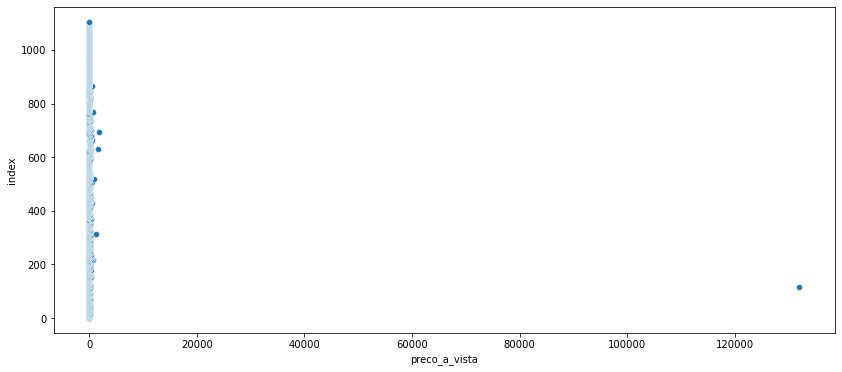

In [97]:
sns.scatterplot(x='preco_a_vista', y='index', data=livros_americanas4)

In [106]:
livros_americanas4 = livros_americanas4[livros_americanas4['preco_a_vista'] != 131989]

In [107]:
livros_americanas4.index = list(range(livros_americanas4.shape[0]))
livros_americanas4

,nome,preco_a_vista,parcelas,preco_parcelado,index
0,Livro - Harry Potter e a pedra filosofal,26.99,2,13.49,0
1,Livro - Harry Potter e a câmara secreta,24.50,2,12.25,1
2,Livro - A rainha vermelha,34.99,3,11.66,2
3,Livro - Harry Potter e o prisioneiro de Azkaban,27.90,2,13.95,3
4,Harry Potter e A Pedra Filosofal Capa Dura + E...,43.90,4,10.97,4
...,...,...,...,...,...
1099,Livro - Nyxia,34.43,3,11.47,1102
1100,"Livro - Guitarra, A",18.04,1,18.04,1103
1101,Livro - Território Fantasma,36.16,3,12.05,1104
1102,Livro - Lino Yang: E os Herdeiros dos Deuses,26.60,2,13.30,1105


In [108]:
livros_americanas4['index'] = livros_americanas4.index

/tmp/ipykernel_3238/2782004292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  livros_americanas4['index'] = livros_americanas4.index


<AxesSubplot:xlabel='preco_a_vista', ylabel='index'>

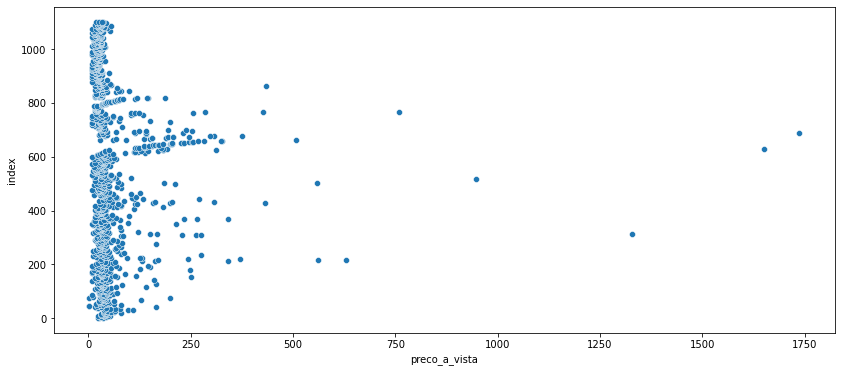

In [109]:
sns.scatterplot(x='preco_a_vista', y='index', data=livros_americanas4)

In [110]:
livros_americanas4.describe().round(2)

,preco_a_vista,parcelas,preco_parcelado,index
count,1104.00,1104.00,1104.00,1104.00
mean,60.52,3.98,12.17,551.50
std,108.93,3.32,8.11,318.84
min,1.99,1.00,0.00,0.00
25%,24.90,2.00,10.25,275.75
50%,33.64,3.00,11.33,551.50
75%,49.96,4.00,13.04,827.25
max,1736.77,12.00,144.73,1103.00


In [111]:
valor = livros_americanas4['preco_a_vista']
q1 = valor.quantile(.25)
q3 = valor.quantile(.75)
iiq = q3 - q1
limite_inferior = q1 - 1.5*iiq
limite_superior = q3 + 1.5*iiq

selecao = (valor >= limite_inferior) & (valor <= limite_superior)
livros_americanas5 = livros_americanas4[selecao]

<AxesSubplot:xlabel='preco_a_vista', ylabel='index'>

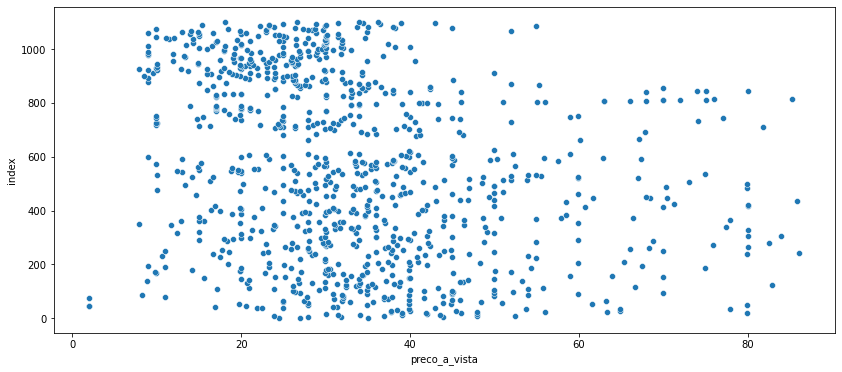

In [112]:
sns.scatterplot(x='preco_a_vista', y='index', data=livros_americanas5)

In [114]:
livros_americanas5.describe().round(2)

,preco_a_vista,parcelas,preco_parcelado,index
count,952.00,952.00,952.00,952.00
mean,33.63,2.86,11.21,555.83
std,15.63,1.60,3.54,332.66
min,1.99,1.00,0.00,0.00
25%,23.26,2.00,10.16,264.75
50%,30.88,3.00,11.22,538.50
75%,39.99,3.25,12.66,865.25
max,86.10,8.00,24.99,1103.00


<AxesSubplot:xlabel='preco_a_vista', ylabel='Count'>

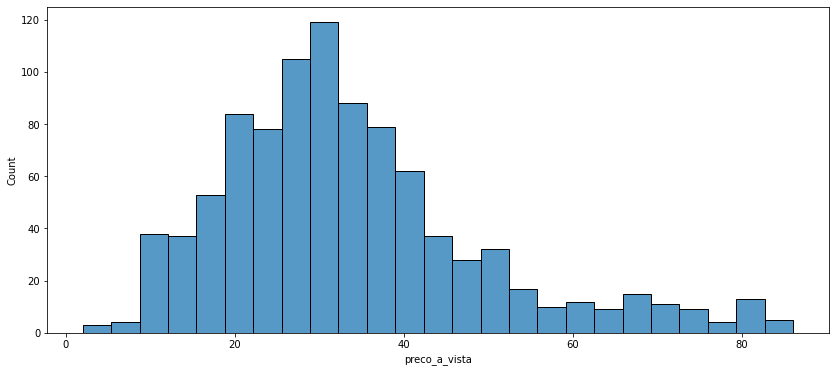

In [117]:
sns.histplot(x='preco_a_vista', data=livros_americanas5)

<AxesSubplot:xlabel='preco_a_vista', ylabel='parcelas'>

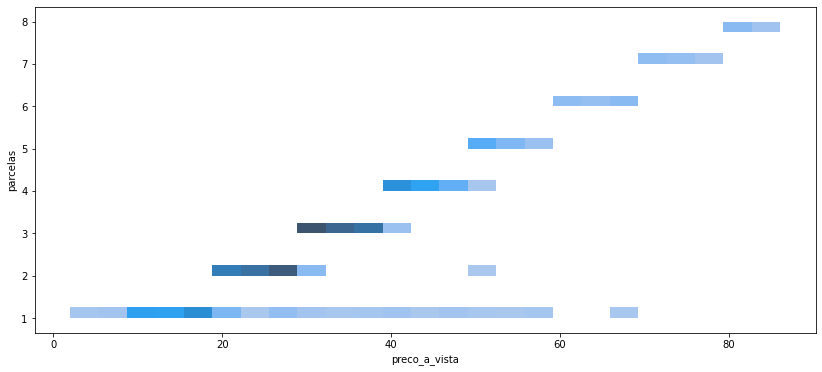

In [118]:
sns.histplot(x='preco_a_vista', y = 'parcelas', data=livros_americanas5)

## Notebook Gamers

In [121]:
notebook_americanas = pd.read_csv('notebook_gamer_americanas.csv', sep = ';')
notebook_americanas

,nome,preco_a_vista,parcelas,preco_parcelado
0,Notebook Acer Nitro Gamer Ryzen 8gb 128ssd + 1...,"7199,00",12,"599,91"
1,Notebook Acer Nitro Gamer Ryzen 16gb 256 Ssd 1...,"7299,00",12,"608,25"
2,Notebook Asus Tuf Gamer I7 40gb 2tb Ssd 3060 6...,"16949,00",12,"1,412,41"
3,Notebook Acer Nitro Gamer Ryzen 8gb 256ssd + 1...,"7299,00",12,"608,25"
4,Notebook Asus Tuf Gamer I7 16gb 256 Ssd 3060 6...,"13749,00",12,"1,145,75"
...,...,...,...,...
331,"Mouse Pad with Wrist Support Gel, auox Ergonom...","479,90",12,"39,99"
332,Inpic Wired Gaming Mouse Ergonomic Mouse rgb 6...,"479,90",12,"39,99"
333,Ergonomic Gaming Mouse Pad with Wrist Support ...,"479,90",12,"39,99"
334,"Mouse Pad with Wrist Support Rest, Rossy Afro ...","479,90",12,"39,99"


In [122]:
notebook_americanas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             336 non-null    object
 1   preco_a_vista    336 non-null    object
 2   parcelas         336 non-null    object
 3   preco_parcelado  336 non-null    object
dtypes: object(4)
memory usage: 10.6+ KB


In [123]:
notebooks = notebook_americanas['nome'].unique()

In [130]:
lista_notebook = []
for notebook in notebooks:
    if notebook.split()[0] == 'Anyshock':
        print(notebook)
    lista_notebook.append(notebook.split()[0])

print(set(lista_notebook))

Anyshock Ergonomic Mouse Pad with Wrist Support, 3D Anime Dog Cute Mouse Pads with Non-Slip Base Gel Wrist Rest, Easy-Typing and Pain Relief for Gaming Computer Laptop Of Importado
Anyshock Desk Mat, Extended Gaming Cute Mouse Pad 35,4 x 15,7 xxl Laptop Beauty Mousepad with Stitched Edges Non Slip Base, Waterproof Computer Desk Pad for Office, Hom Importado
{'Teclado', 'Panda', 'Anyshock', 'Larger', 'Inspirational', 'Green', 'Computer', 'Msguide', 'Royal', 'Gamenote', 'Teal', 'PS4', 'Battle', 'Notebook', 'Marphe', 'Desk', 'Rgb', 'Pokaboo', 'Cooler', 'Anivia', 'Huifen', 'Focket', 'Chonchow', 'Excovip', 'Dareu', 'Gaming', '75%', '60%', 'Itnrsiiet', 'Picasso', 'Suporte', 'Anime', 'Black', 'Kit', 'Aelfox', 'Base', 'Summer', 'Iulonee', 'Simple', 'MageGee', 'Controle', 'Eachbid', 'White', 'Aviation', 'Keyboard', 'Honeycomb', 'Stereo', 'Havit', 'Halloween', 'Floral', 'Large', 'One', 'Nakapa', 'Headphone', 'Duadeli', 'SQDeal', 'Fone', 'Cute', 'Britimes', 'Haocoo', 'USB', 'Portable', 'Mesa', 'G

In [137]:
lista_notebook = []
for notebook in notebooks:
    if notebook.split()[0] == 'Notebook':
        lista_notebook.append(notebook)
    if notebook.split()[1] == 'Notebook' and notebook.split()[0] == 'Kit':
        lista_notebook.append(notebook)
                              
print(set(lista_notebook))

{'Notebook Acer Nitro Gamer Ryzen 8gb 512 Ssd 1650 4gb 15,6', 'Notebook Hp Omen Gaming I7 8gb 512 Ssd 1660ti 6g 15,6 Fhd Customizado', 'Notebook Acer Nitro Gamer Ryzen 8gb 256ssd + 1t 1650 4gb 15,6', 'Notebook Hp Omen Gaming I7 64gb 256ssd + 1t 1660ti 6g 15,6 Fhd Customizado', 'Notebook Acer Nitro Gamer Ryzen 32gb 1tbssd + 2t 1650 4gb 15,6', 'Notebook Hp Omen Gaming I7 64gb 128ssd + 2t 1660ti 6g 15,6 Fhd Customizado', 'Notebook Asus Tuf Gamer I7 16gb 256 Ssd 3060 6gb 15,6 Fhd Customizado', 'Notebook ideapad Gaming 3i i7-10750H 8GB 512GB ssd gtx 1650 4GB 15,6 fhd wva W10 82CG0005BR', 'Notebook Acer Nitro Gamer Ryzen 32gb 256 Ssd 1650 4gb 15,6', 'Notebook Hp Omen Gaming I7 8gb 1tbssd + 2t 1660ti 6g 15,6 Fhd Customizado', 'Notebook Asus Tuf Gamer I7 40gb 512 Ssd 3060 6gb 15,6 Fhd Customizado', 'Notebook Acer Nitro Gamer Ryzen 64gb 256ssd + 1t 1650 4gb 15,6', 'Notebook Asus Tuf Gamer I7 8gb 256 Ssd 3060 6gb 15,6 Fhd Customizado', 'Notebook Acer Nitro Gamer Ryzen 16gb 1tbssd + 2t 1650 4gb 1

In [138]:
notebook_americanas2 = notebook_americanas[notebook_americanas['nome'].isin(lista_notebook)]
notebook_americanas2

,nome,preco_a_vista,parcelas,preco_parcelado
0,Notebook Acer Nitro Gamer Ryzen 8gb 128ssd + 1...,"7199,00",12,"599,91"
1,Notebook Acer Nitro Gamer Ryzen 16gb 256 Ssd 1...,"7299,00",12,"608,25"
2,Notebook Asus Tuf Gamer I7 40gb 2tb Ssd 3060 6...,"16949,00",12,"1,412,41"
3,Notebook Acer Nitro Gamer Ryzen 8gb 256ssd + 1...,"7299,00",12,"608,25"
4,Notebook Asus Tuf Gamer I7 16gb 256 Ssd 3060 6...,"13749,00",12,"1,145,75"
5,Notebook Asus Tuf Gamer I7 16gb 512 Ssd 3060 6...,"13999,00",12,"1,166,58"
6,Notebook Acer Nitro Gamer Ryzen 8gb 512 Ssd 16...,"7399,00",12,"616,58"
7,Notebook Acer Nitro Gamer Ryzen 16gb 128ssd + ...,"7499,00",12,"624,91"
8,Notebook Acer Nitro Gamer Ryzen 32gb 512ssd + ...,"9399,00",12,"783,25"
9,Notebook Acer Nitro Gamer Ryzen 8gb 128ssd + 2...,"7499,00",12,"624,91"


In [139]:
notebook_americanas2 = tratamento_virgula_ponto(notebook_americanas2, ['preco_parcelado'])

/home/radoslz/anaconda3/envs/alura_pandas/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/radoslz/anaconda3/envs/alura_pandas/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [140]:
notebook_americanas2

,nome,preco_a_vista,parcelas,preco_parcelado
0,Notebook Acer Nitro Gamer Ryzen 8gb 128ssd + 1...,"7199,00",12,599.91
1,Notebook Acer Nitro Gamer Ryzen 16gb 256 Ssd 1...,"7299,00",12,608.25
2,Notebook Asus Tuf Gamer I7 40gb 2tb Ssd 3060 6...,"16949,00",12,1412.41
3,Notebook Acer Nitro Gamer Ryzen 8gb 256ssd + 1...,"7299,00",12,608.25
4,Notebook Asus Tuf Gamer I7 16gb 256 Ssd 3060 6...,"13749,00",12,1145.75
5,Notebook Asus Tuf Gamer I7 16gb 512 Ssd 3060 6...,"13999,00",12,1166.58
6,Notebook Acer Nitro Gamer Ryzen 8gb 512 Ssd 16...,"7399,00",12,616.58
7,Notebook Acer Nitro Gamer Ryzen 16gb 128ssd + ...,"7499,00",12,624.91
8,Notebook Acer Nitro Gamer Ryzen 32gb 512ssd + ...,"9399,00",12,783.25
9,Notebook Acer Nitro Gamer Ryzen 8gb 128ssd + 2...,"7499,00",12,624.91


In [141]:
# Função que pega os valores das colunas e deixa de uma forma para transformar en float
def tratamento_virgula(dataset, coluns):
    for i in range(dataset.shape[0]):
        dataset.loc[i, coluns] = dataset.loc[i, coluns].replace(',', '.')   
    dataset = dataset.astype({coluns:float})
    return dataset

In [142]:
notebook_americanas2 = tratamento_virgula(notebook_americanas2, 'preco_a_vista')

In [143]:
notebook_americanas2

,nome,preco_a_vista,parcelas,preco_parcelado
0,Notebook Acer Nitro Gamer Ryzen 8gb 128ssd + 1...,7199.00,12,599.91
1,Notebook Acer Nitro Gamer Ryzen 16gb 256 Ssd 1...,7299.00,12,608.25
2,Notebook Asus Tuf Gamer I7 40gb 2tb Ssd 3060 6...,16949.00,12,1412.41
3,Notebook Acer Nitro Gamer Ryzen 8gb 256ssd + 1...,7299.00,12,608.25
4,Notebook Asus Tuf Gamer I7 16gb 256 Ssd 3060 6...,13749.00,12,1145.75
5,Notebook Asus Tuf Gamer I7 16gb 512 Ssd 3060 6...,13999.00,12,1166.58
6,Notebook Acer Nitro Gamer Ryzen 8gb 512 Ssd 16...,7399.00,12,616.58
7,Notebook Acer Nitro Gamer Ryzen 16gb 128ssd + ...,7499.00,12,624.91
8,Notebook Acer Nitro Gamer Ryzen 32gb 512ssd + ...,9399.00,12,783.25
9,Notebook Acer Nitro Gamer Ryzen 8gb 128ssd + 2...,7499.00,12,624.91


In [150]:
notebook_americanas2 = notebook_americanas2.astype({'parcelas':int})

In [153]:
notebook_americanas2.describe().round(2)

,preco_a_vista,parcelas,preco_parcelado
count,46.00,46.00,46.00
mean,11056.74,11.28,882.35
std,2913.77,2.75,323.94
min,5609.15,1.00,0.00
25%,8761.50,12.00,713.46
50%,11174.00,12.00,931.16
75%,13561.50,12.00,1130.12
max,16949.00,12.00,1412.41


In [154]:
notebook_americanas2['index'] = notebook_americanas2.index

<AxesSubplot:xlabel='index', ylabel='preco_a_vista'>

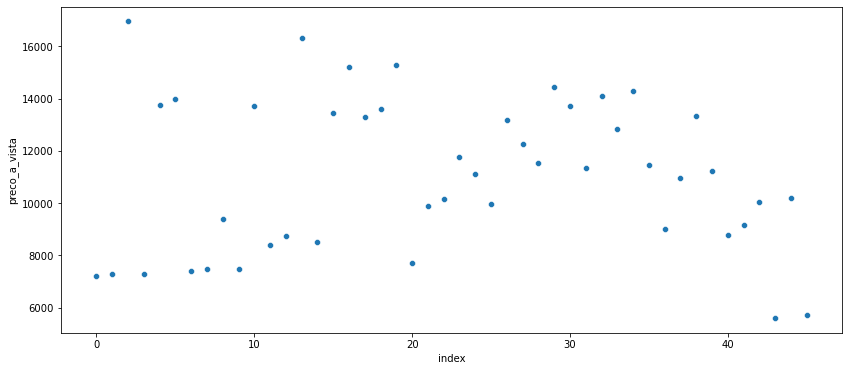

In [156]:
sns.scatterplot(x = 'index', y = 'preco_a_vista', data = notebook_americanas2)

<AxesSubplot:xlabel='preco_a_vista', ylabel='Count'>

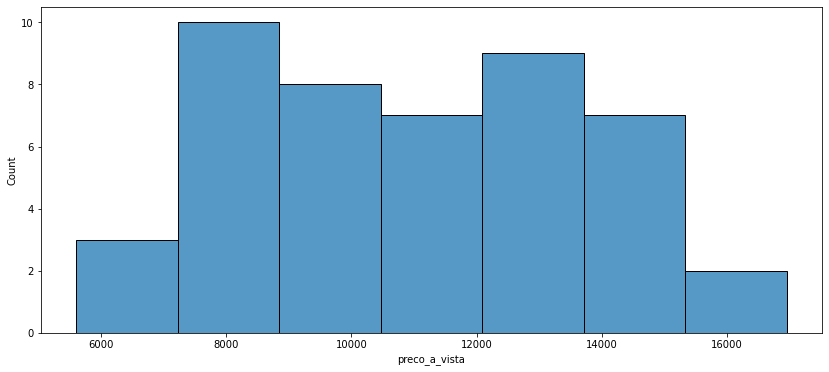

In [160]:
sns.histplot(x = 'preco_a_vista', data = notebook_americanas2)